In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Constants
m = 9.11e-31 # mass
L = 10e-9 # Length of well meters
N = 100 # number of points 
h = 1 # planks constant as 1 to avoid the calculation errors 

# step size
dx = L / (N + 1)

# off-diagonal elements
off_diag = - (h**2 / (2 * m * dx**2))

# diagonal elements
diag = 2 * off_diag * np.ones(N)

# Hamiltonian matrix
H = np.diag(diag) + np.diag(off_diag * np.ones(N-1), k=1) + np.diag(off_diag * np.ones(N-1), k=-1)

print(H)

[[-1.11975851e+50 -5.59879254e+49  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.59879254e+49 -1.11975851e+50 -5.59879254e+49 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.59879254e+49 -1.11975851e+50 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.11975851e+50
  -5.59879254e+49  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.59879254e+49
  -1.11975851e+50 -5.59879254e+49]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -5.59879254e+49 -1.11975851e+50]]


In [22]:
# finding eigenvalues and eigenvectors 
eig_vals, eig_vecs = np.linalg.eig(H)

# sorting
idx = np.argsort(eig_vals)
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

for n in range(1, 6):
    En = eig_vals[n-1]
    psi_n = eig_vecs[:, n-1]
    print(f"n={n}, E_n={En:.3e} J")
    print(f"Wave function:\n{psi_n}\n")

n=1, E_n=-2.239e+50 J
Wave function:
[-0.00437636 -0.00874848 -0.01311214 -0.01746312 -0.0217972  -0.02611019
 -0.03039792 -0.03465625 -0.03888104 -0.04306823 -0.04721374 -0.05131358
 -0.05536378 -0.05936042 -0.06329963 -0.0671776  -0.07099058 -0.07473488
 -0.07840688 -0.08200303 -0.08551985 -0.08895393 -0.09230195 -0.09556068
 -0.09872696 -0.10179772 -0.10477001 -0.10764093 -0.11040772 -0.1130677
 -0.11561829 -0.11805703 -0.12038155 -0.12258962 -0.12467908 -0.12664793
 -0.12849426 -0.13021627 -0.13181231 -0.13328083 -0.1346204  -0.13582975
 -0.13690768 -0.13785317 -0.13866529 -0.13934326 -0.13988643 -0.14029426
 -0.14056637 -0.14070249 -0.14070249 -0.14056637 -0.14029426 -0.13988643
 -0.13934326 -0.13866529 -0.13785317 -0.13690768 -0.13582975 -0.1346204
 -0.13328083 -0.13181231 -0.13021627 -0.12849426 -0.12664793 -0.12467908
 -0.12258962 -0.12038155 -0.11805703 -0.11561829 -0.1130677  -0.11040772
 -0.10764093 -0.10477001 -0.10179772 -0.09872696 -0.09556068 -0.09230195
 -0.08895393 -0.

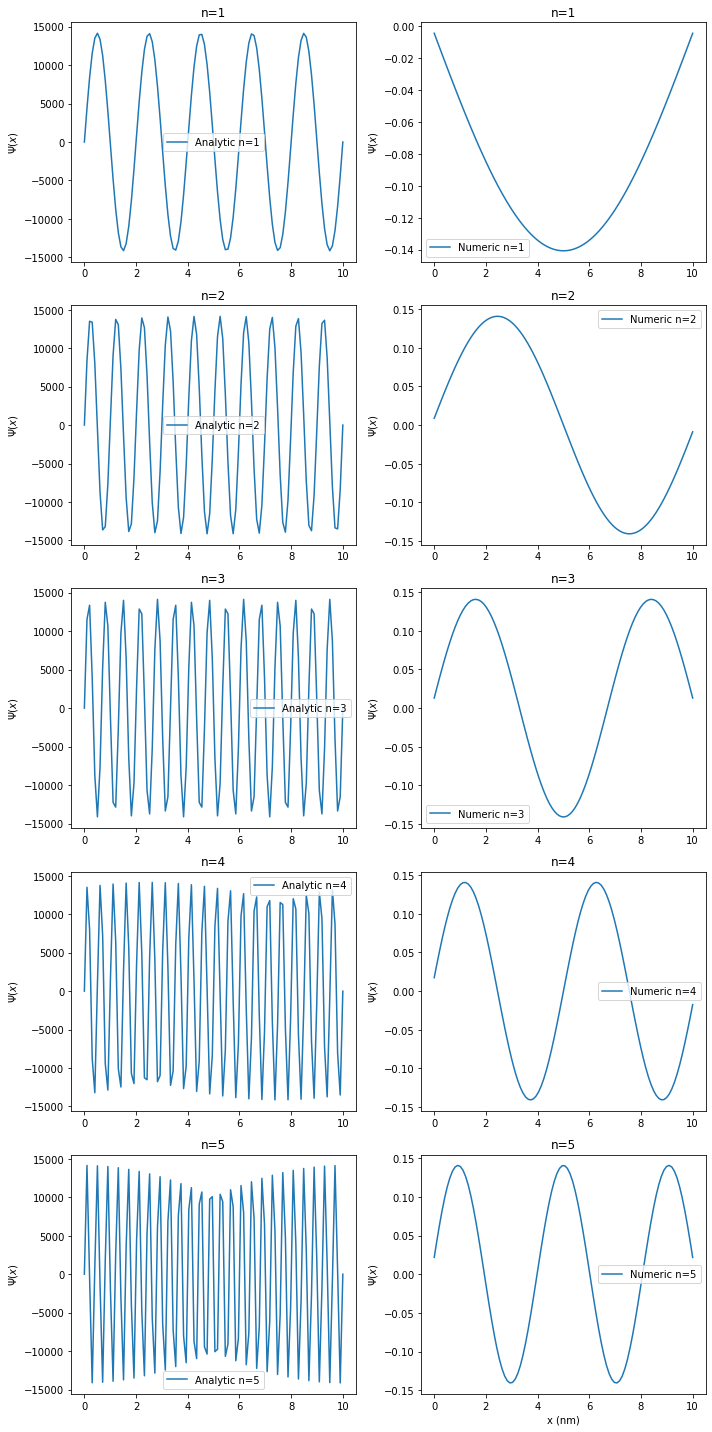

In [30]:
# x-axis
x = np.linspace(0, L*1e9, N)

# analytic solution 
def psi_a(n, x):
    return np.sqrt(2/L)*np.sin(n*np.pi/L*x)

# create figure
fig, axs = plt.subplots(5, 2, figsize=(10,20))

# Plot wave function for each n 
for i, n in enumerate(range(1,6)):
    psi_a1 = psi_a(n, x)
    axs[i, 0].plot(x, psi_a1, label=f"Analytic n={n}")
    axs[i, 0].set_ylabel(r"$\Psi(x)$")
    axs[i, 0].set_title(f"n={n}")
    axs[i,0].legend()
    
    # Numeric
    psi_num = eig_vecs[:, i]
    axs[i, 1].plot(x, psi_num, label=f"Numeric n={n}")
    axs[i, 1].set_ylabel(r"$\Psi(x)$")
    axs[i, 1].set_title(f"n={n}")
    axs[i, 1].legend()
plt.xlabel('x (nm)')
plt.tight_layout()
plt.show()

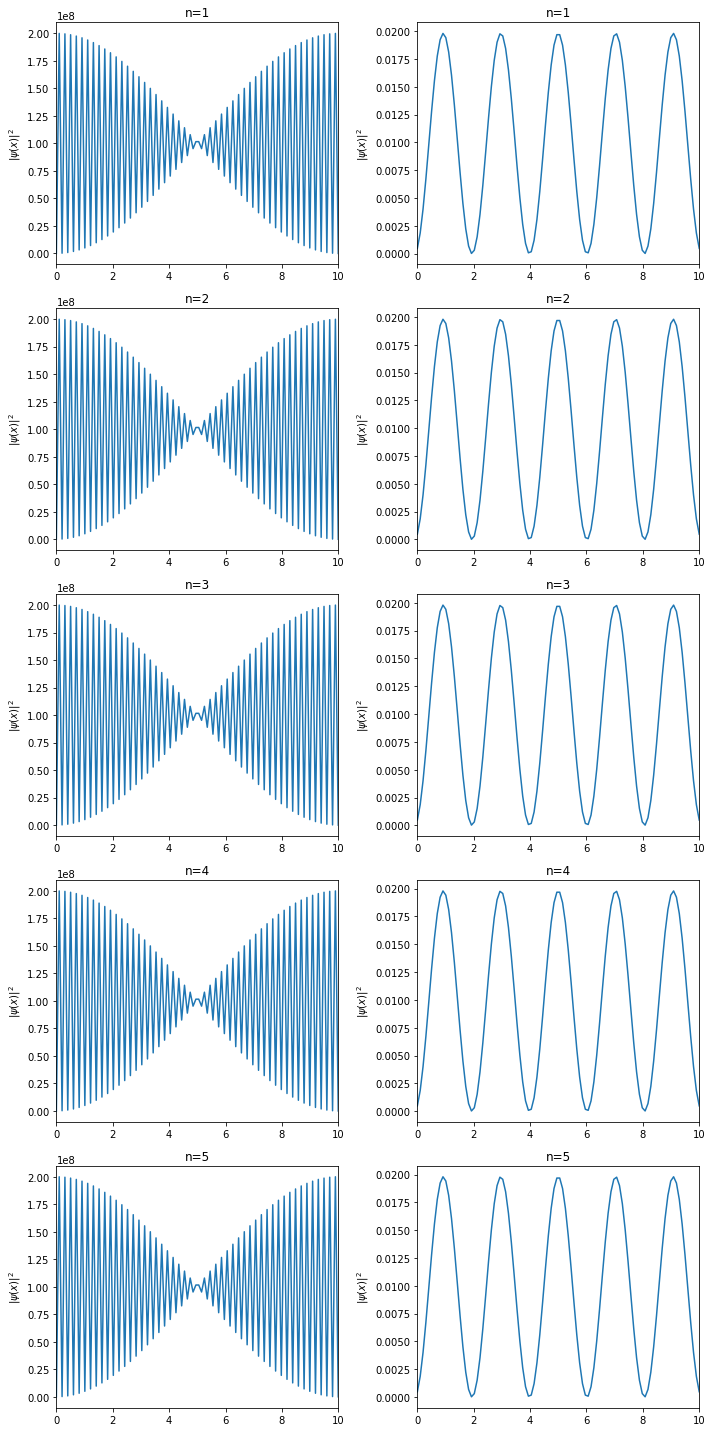

In [38]:
# prob density 
def prob_density(psi):
    return np.abs(psi)**2

# plot densities
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for n in range(1, 6):
    #analytic 
    prob_a = prob_density(psi_a1)
    axs[n-1, 0].plot(x, prob_a, label="Analytic")
    axs[n-1, 0].set_title(f"n={n}")
    axs[n-1, 0].set_ylabel(r"$|\psi(x)|^2$")
    axs[n-1, 0].set_xlim(0, 10)
    
    # Numeric 
    prob_b = prob_density(psi_num)
    axs[n-1, 1].plot(x, prob_b, label="Numeric")
    axs[n-1, 1].set_title(f"n={n}")
    axs[n-1, 1].set_ylabel(r"$|\psi(x)|^2$")
    axs[n-1, 1].set_xlim(0, 10)
    
plt.tight_layout()
plt.show()
